# 🧠 **Understanding ADHD** 
 ###  👩🏻‍🔧    **By Rosy**

## 🎯 **Goals & Tasks:**

**1. Provide insights by means of Data.**

**2. Understanding ADHD， especially in women and children.**

**3. Advancing personalized medicine for neurodevelopmental disorders through an effective model.** 

## ⚖️ **Measurements (Feature Variables):**

#### 1. **Questionnaires:** 
* **The Strength and Difficulties Questionnaire**

* **Alabama Parenting Questionnaire**

* **Barratt Simplified Measure of Social Status**

#### 2. **Clinical Measurements**: 
* **Edinburgh Handedness Inventory** 

* **Color Vision Test** 

#### 3. **Functional Connectivity Matrix** 

## 💡 **Target Variables:**

1. **ADHD Diagnosis (ADHD_Outcome)** 
2. **Biological Sex (Sex_F)**  

##  🗂️  ***Import Libraries***  

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp 
import missingno as msno 
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

import warnings 
warnings.filterwarnings('ignore')   

In [2]:
os.listdir('/kaggle/input/adhd-train-data')   
os.listdir('/kaggle/input/adhd-solutions')  
os.listdir('/kaggle/input/functional-matrices')   

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

##  ⏳ ***Data Loading & Merging***  

In [3]:
df_quan = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_QUANTITATIVE .xlsx')   
df_cat = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_CATEGORICAL.xlsx') 
df_solu = pd.read_excel('/kaggle/input/adhd-solutions/TRAINING_SOLUTIONS.xlsx')

In [4]:
df = df_quan.merge(df_cat, on='participant_id', how='inner').merge(
                                                                    df_solu, 
                                                                    on='participant_id', 
                                                                    how='inner')

## 🔭 ***Data Exploration (EDA)***  

### 🔍 **1. Info & Dtype of Data**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1200 non-null   float64
 2   ColorVision_CV_Score              1190 non-null   float64
 3   APQ_P_APQ_P_CP                    1201 non-null   float64
 4   APQ_P_APQ_P_ID                    1201 non-null   float64
 5   APQ_P_APQ_P_INV                   1201 non-null   float64
 6   APQ_P_APQ_P_OPD                   1201 non-null   float64
 7   APQ_P_APQ_P_PM                    1201 non-null   float64
 8   APQ_P_APQ_P_PP                    1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems          1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total        1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems        1204 non-null   float64
 12  SDQ_SD

### 🔍 **2.Take a Glimpse of Data**

In [6]:
df.head(5).T   

,0,1,2,3,4
participant_id,00aIpNTbG5uh,00fV0OyyoLfw,04X1eiS79T4B,05ocQutkURd6,06YUNBA9ZRLq
EHQ_EHQ_Total,100.0,92.27,86.67,93.34,0.0
ColorVision_CV_Score,13.0,14.0,14.0,14.0,14.0
APQ_P_APQ_P_CP,3.0,3.0,3.0,3.0,8.0
APQ_P_APQ_P_ID,15.0,12.0,21.0,11.0,12.0
APQ_P_APQ_P_INV,44.0,35.0,37.0,42.0,35.0
APQ_P_APQ_P_OPD,14.0,25.0,18.0,15.0,22.0
APQ_P_APQ_P_PM,20.0,28.0,26.0,20.0,12.0
APQ_P_APQ_P_PP,27.0,30.0,28.0,28.0,24.0
SDQ_SDQ_Conduct_Problems,3.0,5.0,3.0,0.0,6.0


### 🔍 **3. Descriptive Statistics**

In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
EHQ_EHQ_Total,1200.0,59.514750,49.744631,-100.0,46.670000,77.800000,94.470000,100.000000
ColorVision_CV_Score,1190.0,13.419328,2.112830,0.0,14.000000,14.000000,14.000000,14.000000
APQ_P_APQ_P_CP,1201.0,3.819317,1.330348,2.0,3.000000,3.000000,4.000000,12.000000
APQ_P_APQ_P_ID,1201.0,13.337219,3.593562,5.0,11.000000,13.000000,16.000000,28.000000
APQ_P_APQ_P_INV,1201.0,39.767694,4.872729,23.0,36.000000,40.000000,43.000000,50.000000
APQ_P_APQ_P_OPD,1201.0,17.963364,3.333965,7.0,16.000000,18.000000,20.000000,28.000000
APQ_P_APQ_P_PM,1201.0,16.557036,5.146548,5.0,13.000000,16.000000,19.000000,37.000000
APQ_P_APQ_P_PP,1201.0,25.498751,3.053720,13.0,23.000000,26.000000,28.000000,30.000000
SDQ_SDQ_Conduct_Problems,1204.0,2.074751,2.022992,0.0,0.000000,2.000000,3.000000,10.000000
SDQ_SDQ_Difficulties_Total,1204.0,12.213455,6.517330,0.0,7.000000,12.000000,17.000000,34.000000


### 🔍 **4. Dimensions of DataFrame**

In [8]:
print(f'Rows: {df.shape[0]}')
print(f'Columns:{df.shape[1]}')  

Rows: 1213
Columns:30


### 🔍 **5. Check Duplicated & Missing Values** 

In [9]:
print(f'Duplicated: {df.duplicated().sum()}') 

Duplicated: 0


In [10]:
missing_counts = df.isnull().sum() 
missing_df = pd.DataFrame({'No. of Missing Values' : missing_counts[missing_counts>0].sort_values(ascending=False), 
                           '% of Missing Values': (missing_counts[missing_counts>0] / len(df) * 100).sort_values(ascending=False) 
                          })

missing_df.style.background_gradient('magma')   

,No. of Missing Values,% of Missing Values
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723
APQ_P_APQ_P_PP,12,0.989283


### 🔍 **6. Define Target Columns**

In [11]:
target_cols = ['ADHD_Outcome', 'Sex_F']  

### 🔍 **7. Looking for Overall Correlations**

In [12]:
df.drop('participant_id', axis=1, inplace=True)   

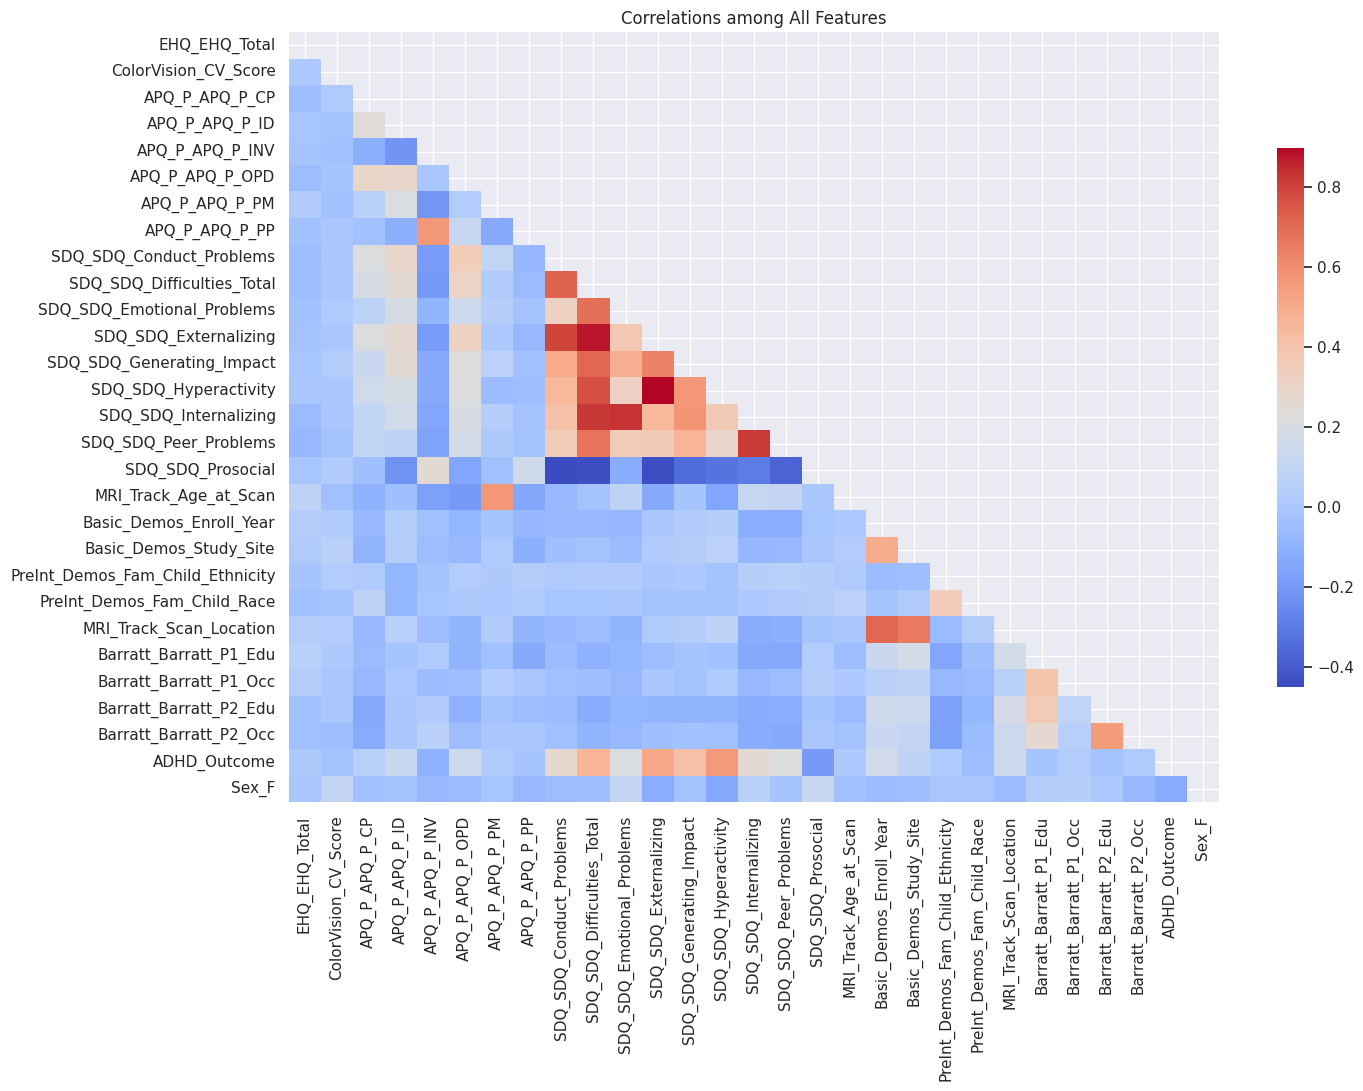

In [13]:
corr_matrix = df.corr() 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            mask=mask,
            cmap='coolwarm',
            cbar_kws={'shrink':0.7}) 


plt.title('Correlations among All Features') 
plt.show() 

### 🔍 **8. Looking for Correlations between All Features and Target Variables** 

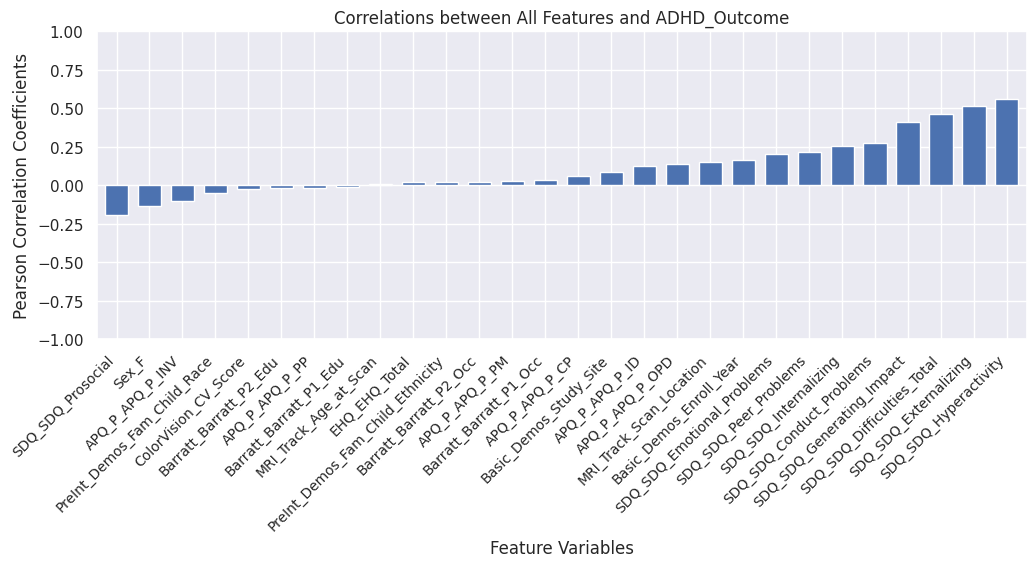

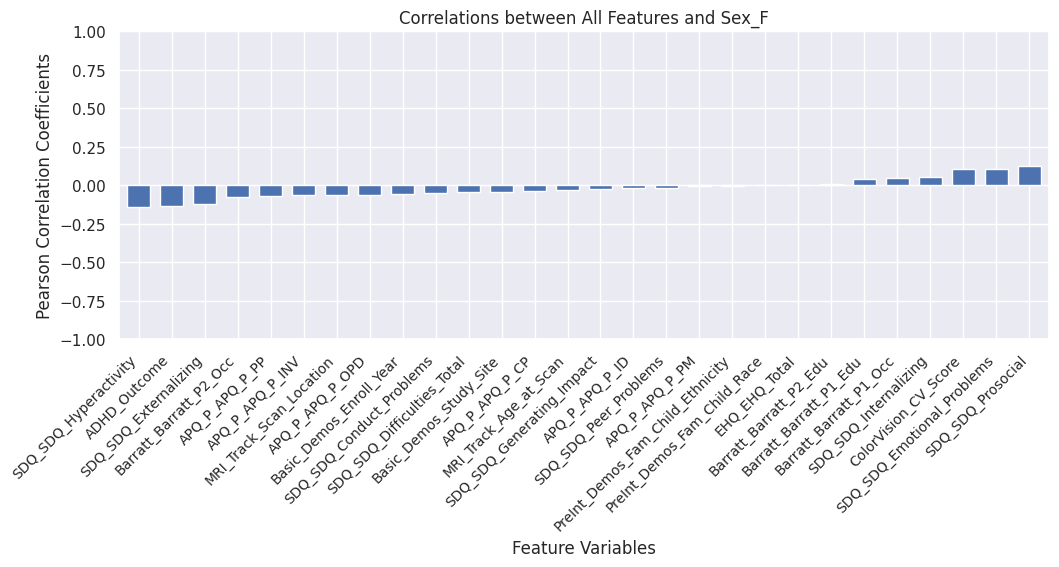

In [14]:
for col in target_cols:
    corr = df.corr()[col].drop(col).sort_values() 
    fig = plt.figure(figsize=(12,4)) 
    ax = corr.plot(kind='bar', width=0.7) 

    ax.set(ylim=[-1,1],
          ylabel='Pearson Correlation Coefficients',
          xlabel  = 'Feature Variables', 
          title = f'Correlations between All Features and {col}'  
          ) 
    ax.set_xticklabels(corr.index,
                      rotation=45,
                      ha='right',
                      fontsize=10) 
    plt.show() 

##  🔨***Data Cleaning & Preprocessing***  

### 🔍 **1. Visualization of Distribution & Correlations between Missing Values**

<Axes: >

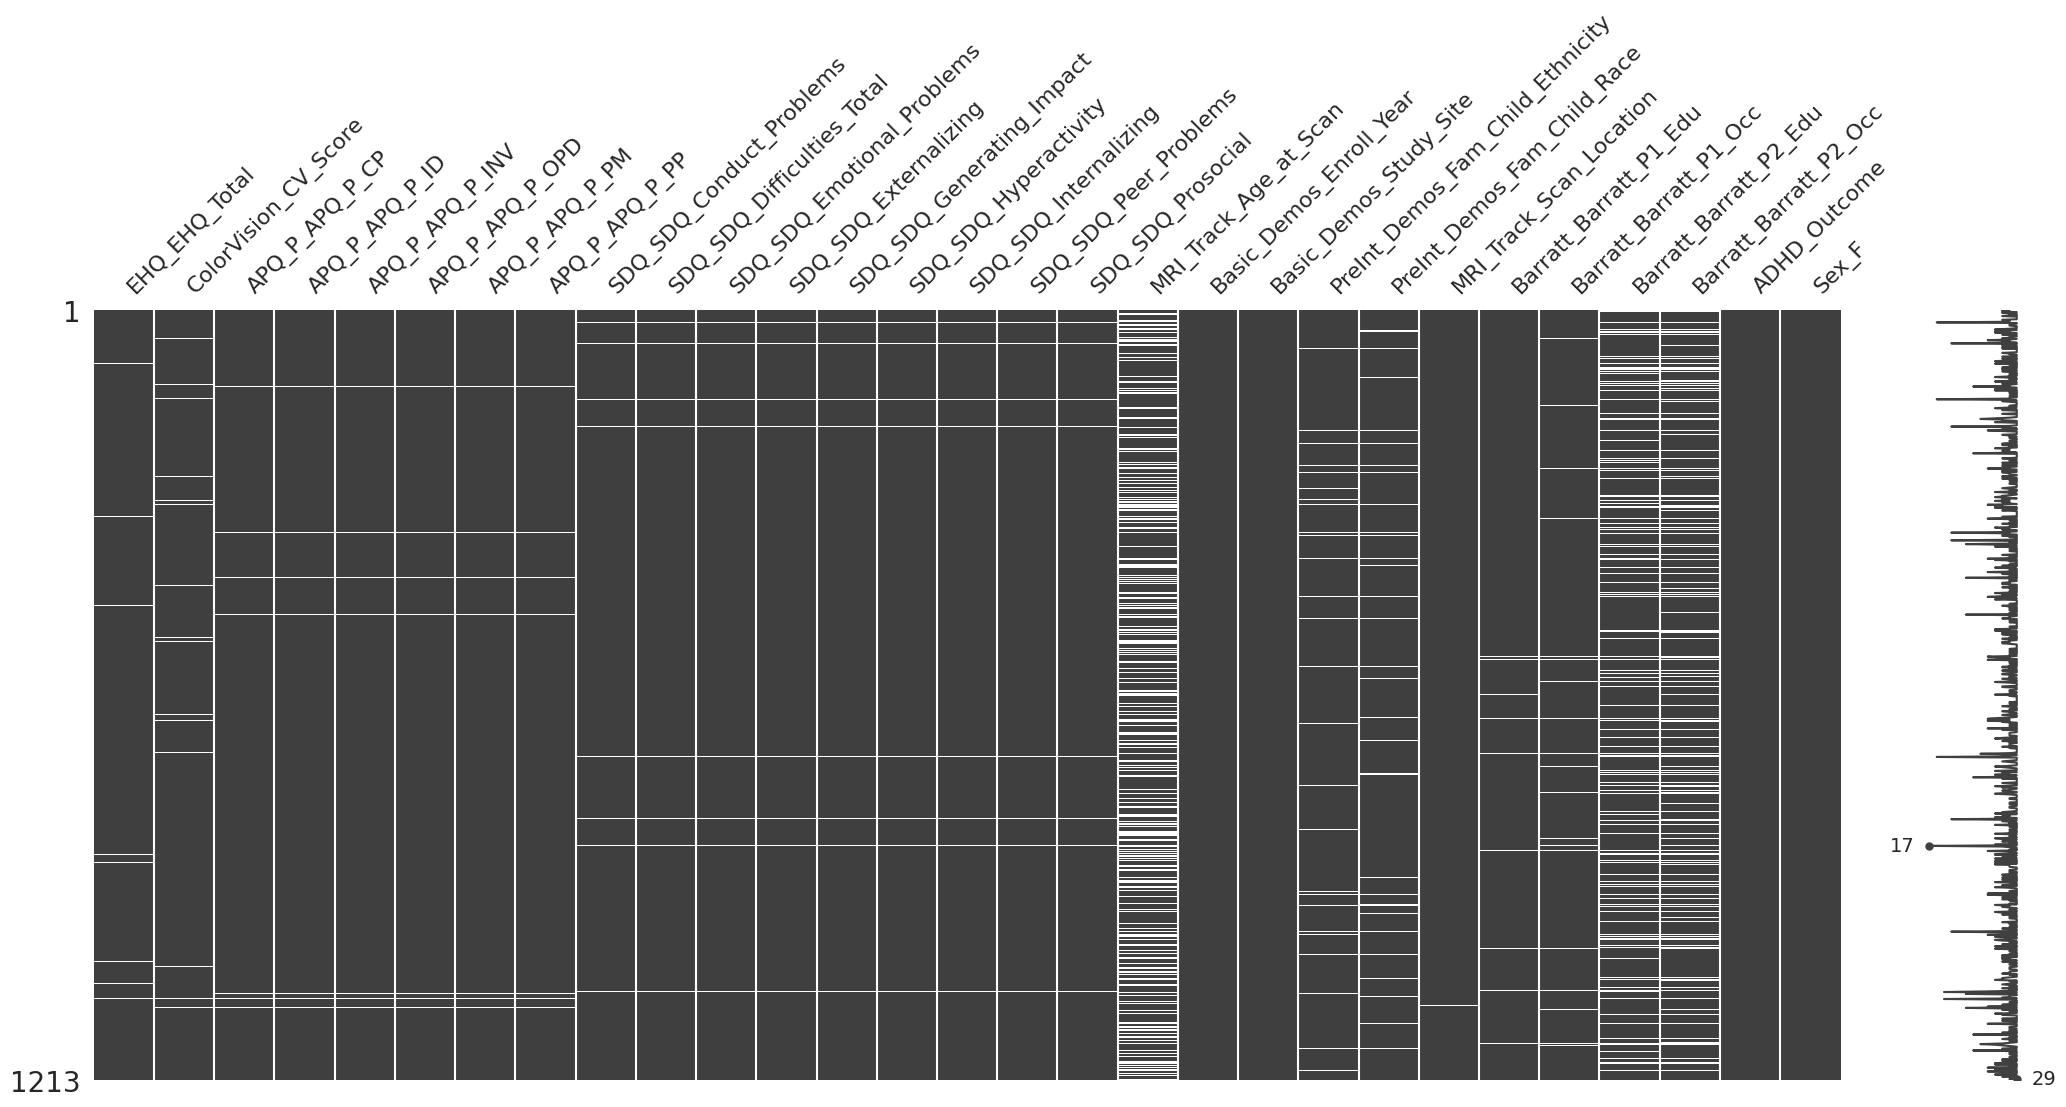

In [15]:
msno.matrix(df)   

<Axes: >

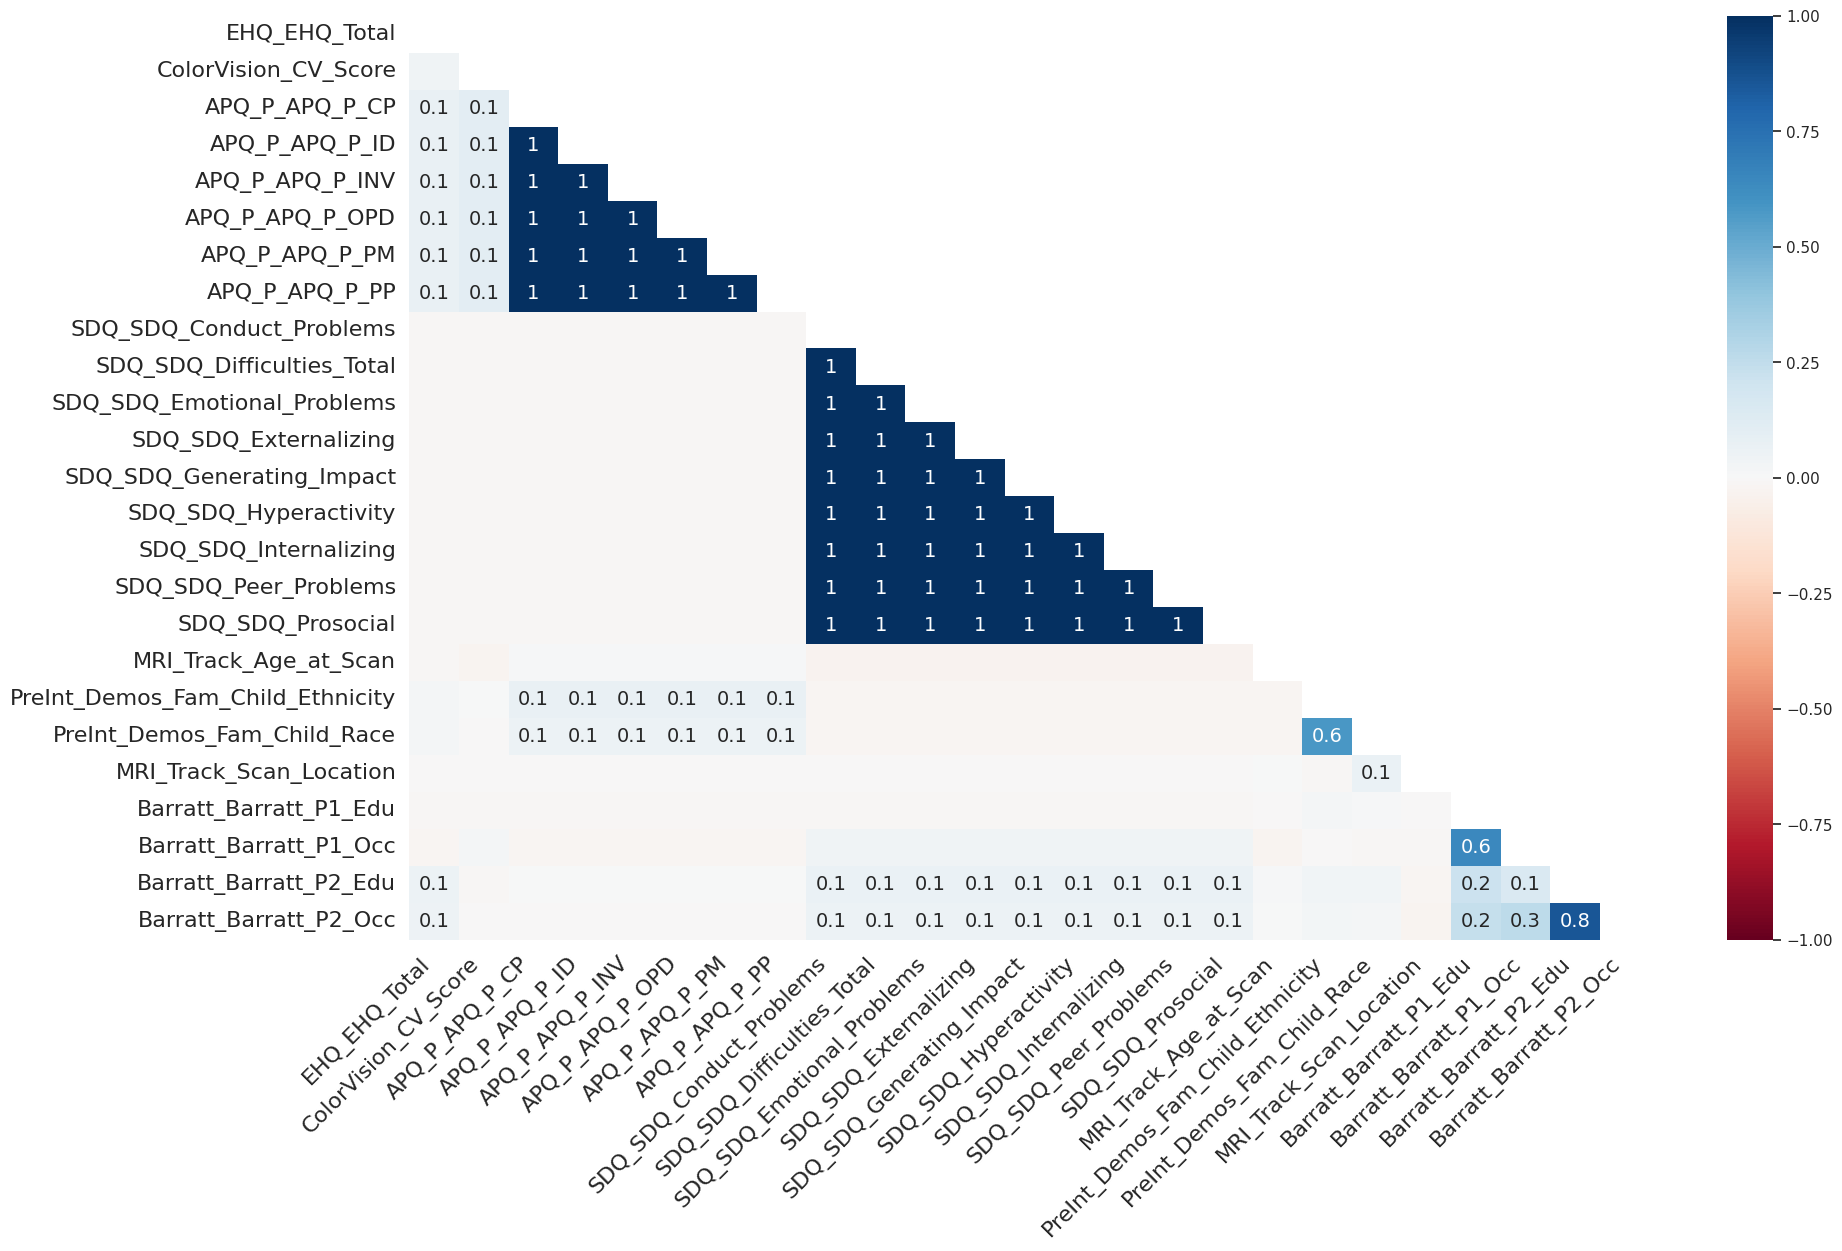

In [16]:
msno.heatmap(df) 

### 📝 **Note:** 

#### **1. MCAR (Missing Completely at Random)** 
**The missing values in the following columns are completely random:** 

    MRI_Track_Age_at_Scan 
    EHQ_EHQ_Total 
    ColorVision_CV_Score 

#### **2. MAR (Missing at Random)** 
**The absence depends on observed data:**
* **APQ & SDQ Columns: The missing values in one subscale depend on other subscales.** 
* **PreInt_Demos_Fam_Child_Ethnicity: Missingness depends on PreInt_Demos_Fam_Child_Race.**
* **Barratt_Barratt_P1_Edu: Missingness depends on Barratt_Barratt_P1_Occ (the same applies to P2).**


### 🔍 **2. Dealing with MCAR**

* **The variables in Columns MRI_Track_Age_at_Scan, EHQ_EHQ_Total, and ColorVision_CV_Score exhibited completely random missingness, with missing percentages of 29.678%, 1.072%, and 1.896% respectively.**

*  **Given the high missing rate(29.678%) in Column MRI_Track_Age_at_Scan: Imputation using Global Median.**

    **Reason 1: Local Median imputation may overfit small subgroups(which may amplify noise), especially when missing data is highly clustered.**

   **Reason 2: With 29.678% missing data, subgroups may have insufficient samples for reliable median calculation. (The Global Median can reduce variance in imputation.)**

   **Reason 3: The low standard deviation(3.234) indicates tightly clustered data around the median, suggesting that the Global Median is a robust central tendency measure.**

   **Reason 4: For the Columns EHQ_EHQ_Total and ColorVision_CV_Score, filling in the median prevents the effects of extreme values.** 

   


In [17]:
fill_median_cols = ['MRI_Track_Age_at_Scan', 'EHQ_EHQ_Total', 'ColorVision_CV_Score'] 

for col in fill_median_cols:
    df[col].fillna(df[col].median(), inplace=True)  

### 🔍 **3. Dealing with Missing Values in SDQ & APQ**

* **They are all quantitative variables but in essence are ordinal categorical(Likert_Scale).**
  * ** 
* **All columns of APQ have 12 missing values, accounting for 0.989% of the whole dataframe respectively, and 9 missing values in all columns of SDQ, with the percentage of 0.742% respectively.**

  * **
* **In Summary: Ordinal Categorical + Percentage of Missing Values is very small --> Mode Imputation.**
  
  * **
* **The columns in SDQ and APQ have correlations with target variables (from heatmap) --> fill in Local Mode imputation stratify by target columns (ADHD_Outcome & Sex_F).**    

In [18]:
def fill_in_na_mode(df,cols_to_fill, groupby_cols):  
    for col in cols_to_fill: 
        df[col].fillna(df.groupby(groupby_cols)[col].transform(lambda x:x.mode()[0]),
                       inplace=True)  

    return df 



SDQ_cols = [col for col in df.columns if col.startswith('SDQ')] 
APQ_cols= [col for col in df.columns if col.startswith('APQ')]   

fill_in_na_mode(df, SDQ_cols, target_cols) 
fill_in_na_mode(df, APQ_cols, target_cols)           

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,4,1.0,1.0,3.0,12.0,NaN,15.0,5.0,0,1
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0


### 🔍 **4. Handling Categorical Attributes** 

<Axes: >

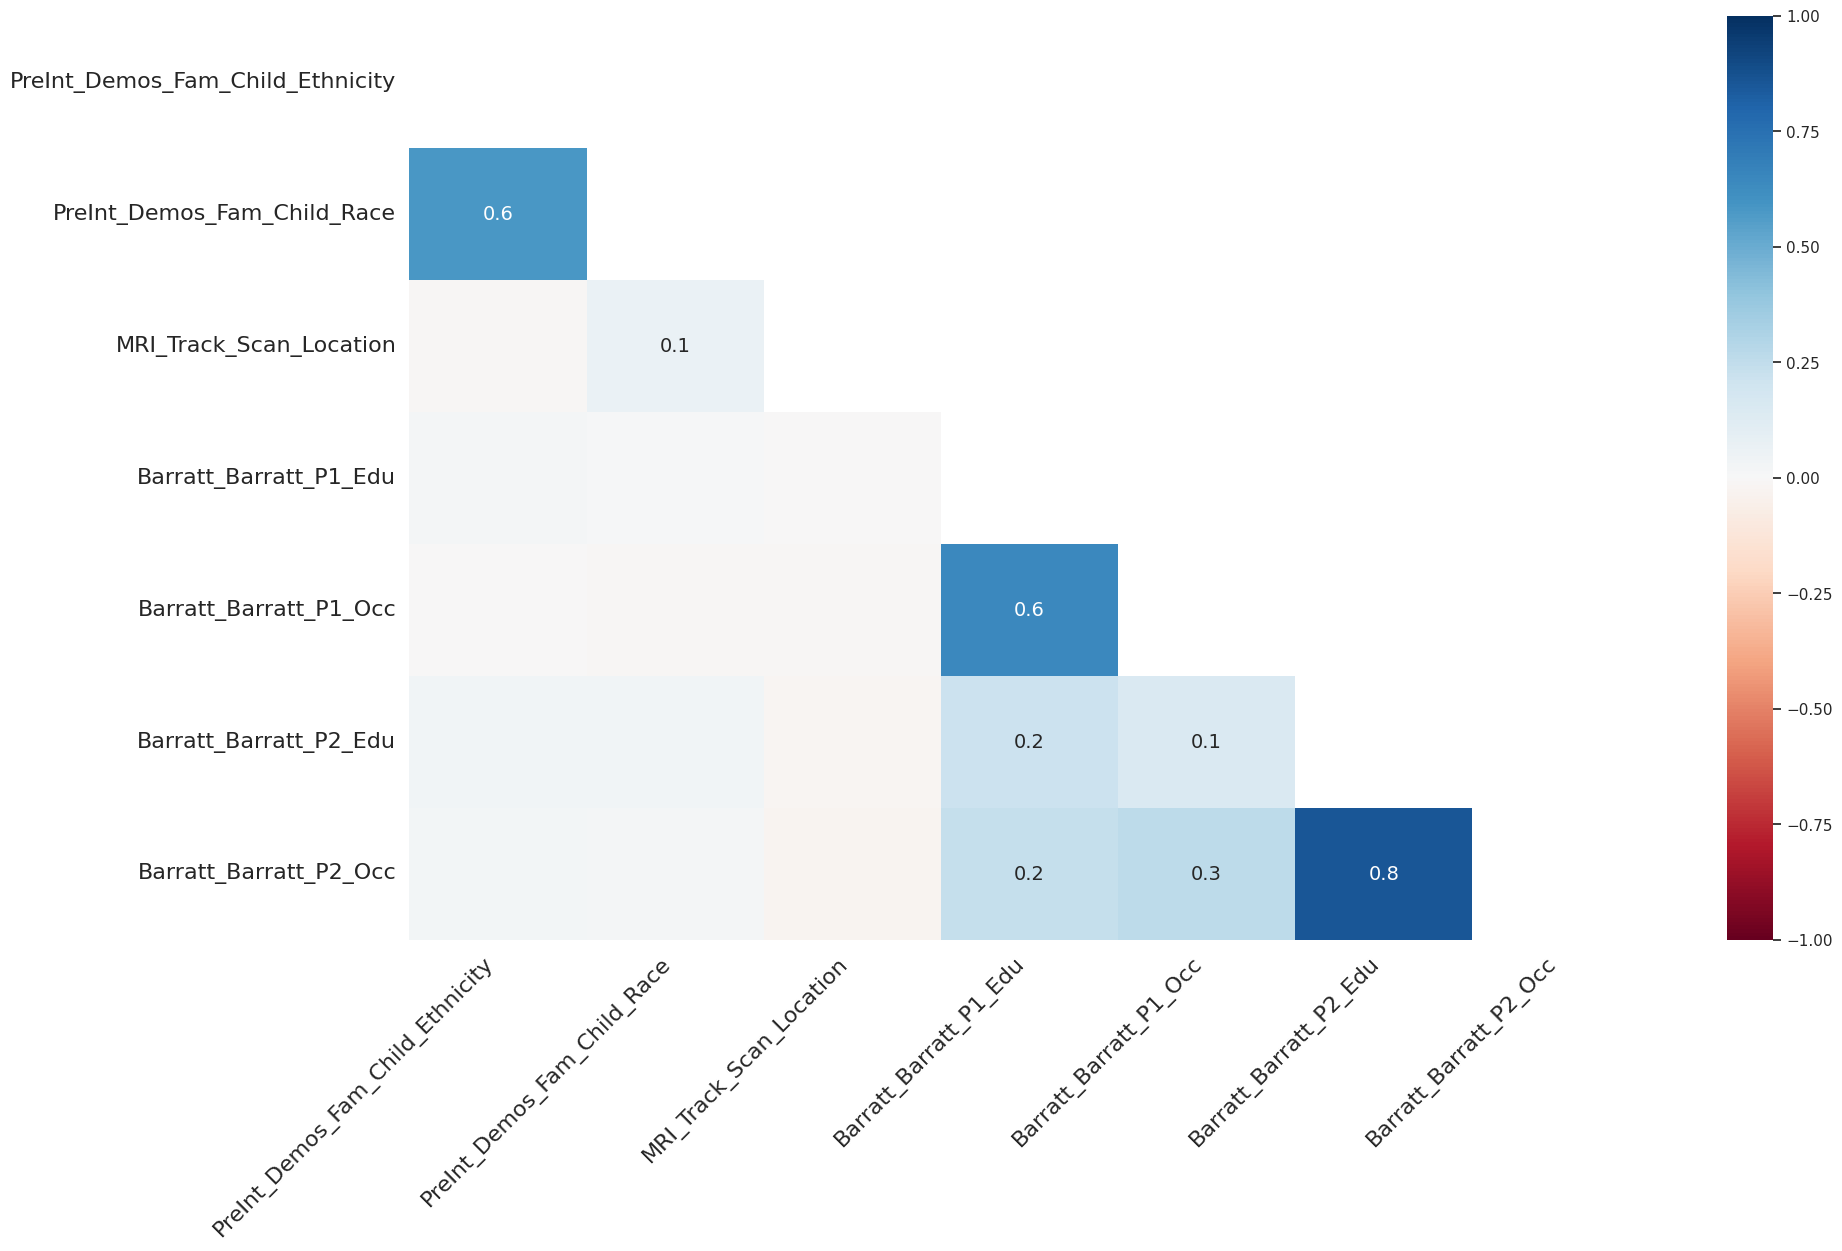

In [19]:
msno.heatmap(df)

### **Dealing with Missing Values in Barratt Simplified Measure of Social Status**


   #### 1. The values are ordinal categorical but are represented numerically.

   #### 2. **Missing Value Statistics**

   * P2(Mother):
       * Barratt_Barratt_P2_Occ: 222 missing (18.30%)
       * Barratt_Barratt_P2_Edu: 198 missing (16.32%)
       * The missing values in **Barratt_Barratt_P2_Occ** and **Barratt_Barratt_P2_Edu** have a strong correlation(0.8)
   * P1(Father):
       * Barratt_Barratt_P1_Occ:  31 missing (2.55%)
       * Barratt_Barratt_P1_Edu:  15 missing (1.24%)
       * The missing values in **Barratt_Barratt_P1_Occ** and **Barratt_Barratt_P1_Edu** have a moderate correlation(0.6).

   #### 3. **Strategies for Handling Missing Values**
   * Create two new indicator columns:
     * One to flag if both P2_Occ and P2_Edu are missing (possibly indicating a single-parent family). 
     * Another to flag if both P1_Occ and P1_Edu are missing.
   * Predictive Imputation:
     * If only one of the two correlated values is missing (e.g., P2_Occ is missing but P2_Edu is available), use the non-missing value to predict the missing one (using a regression model).

In [20]:
from sklearn.ensemble import RandomForestClassifier    

def fill_missing_bidirectional(data, col1, col2):
    df_copy = data.copy()   
    missing_col1 = df_copy[col1].isna() & ~df_copy[col2].isna() 
    missing_col2 = df_copy[col2].isna() & ~df_copy[col1].isna()  

    if missing_col1.any(): 
        known_data = df_copy.dropna(subset=[col1, col2]) 
        X = known_data[[col2]].values
        y = known_data[col1].values  
        model = RandomForestClassifier(random_state=42)  
        model.fit(X,y) 
        df_copy.loc[missing_col1, col1] = model.predict(df_copy.loc[missing_col1, [col2]]) 


    if missing_col2.any(): 
        known_data = df_copy.dropna(subset=[col1,col2]) 
        X = known_data[[col1]].values
        y = known_data[col2].values
        model = RandomForestClassifier(random_state=42) 
        model.fit(X, y) 
        df_copy.loc[missing_col2, col2] = model.predict(df_copy.loc[missing_col2, [col1]]) 
        
    return df_copy



df = fill_missing_bidirectional(data = df,  
                                col1 = 'Barratt_Barratt_P2_Occ', 
                                col2 = 'Barratt_Barratt_P2_Edu') 

df = fill_missing_bidirectional(data = df, 
                                col1= 'Barratt_Barratt_P1_Occ', 
                                col2= 'Barratt_Barratt_P1_Edu')   

In [21]:
df['flag2_Missing'] = (
                        df['Barratt_Barratt_P2_Occ'].isna() 
                        & df['Barratt_Barratt_P2_Edu'].isna()
                        ).astype(int)   


df['flag1_Missing'] = (
                        df['Barratt_Barratt_P1_Occ'].isna() 
                         & df['Barratt_Barratt_P1_Edu'].isna()
                        ).astype(int)      

In [22]:
def fill_missing_pairs(df, flag_col, target_columns, special_val= -99):
    
    for col in target_columns:
        df.loc[df[flag_col]==1, col] = special_val   
    return df 



df = fill_missing_pairs(df,
                       'flag2_Missing',
                       ['Barratt_Barratt_P2_Occ','Barratt_Barratt_P2_Edu']) 

df = fill_missing_pairs(df,
                        'flag1_Missing', 
                         ['Barratt_Barratt_P1_Occ','Barratt_Barratt_P1_Edu'])    

### 🏫 **MRI_Track_Scan_Location & Ethnicity & Race** 

#### **📝 Note:**  

1. Since the missing percentage in Columns MRI_Track_Scan_Location, PreInt_Demos_Fam_Child_Ethnicity, and PreInt_Demos_Fam_Child_Race is less than 5%, so I decide to drop the missing values. 

In [23]:
df = df.dropna(
                subset=['PreInt_Demos_Fam_Child_Ethnicity',
                       'PreInt_Demos_Fam_Child_Race',
                       'MRI_Track_Scan_Location']
                )    

# 🎥   ***Data Visualization***    


### **1️⃣ Distribution of ADHD & Control Group**   

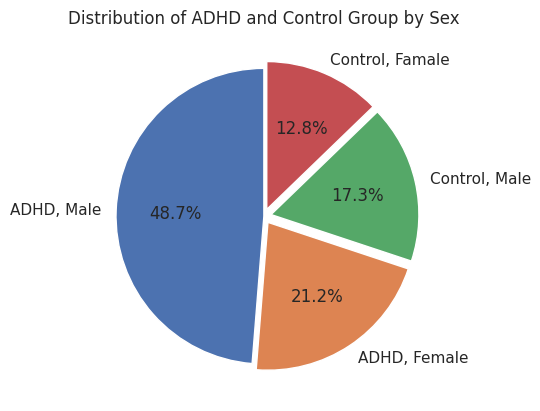

In [24]:
label_map = {
    (0,0) : 'Control, Male',
    (0,1) : 'Control, Famale',
    (1,0) : 'ADHD, Male',
    (1,1) :  'ADHD, Female' 
            }  

counts = df[['ADHD_Outcome','Sex_F']].value_counts() 
custom_labels = [label_map[idx] for idx in counts.index] 
explode=(0, 0.05, 0.05, 0.05)

counts.plot(kind='pie',
            autopct='%1.1f%%',
            startangle=90,
            explode = explode,
            labels = custom_labels) 
                                      
                                       
                                                                       
plt.ylabel('')
plt.title('Distribution of ADHD and Control Group by Sex')  
plt.show() 

#### **📝 Note:**

* **The dataset was imbalanced, with the ADHD Group comprising 68.5% of the participants, compared to 31.5% in the control group.**
  
* **For the ADHD Group,the diagnosis rate was significantly higher in males compare to females.**

 ####  2️⃣ ***SDQ(means) & APQ(means) by ADHD Outcome***  

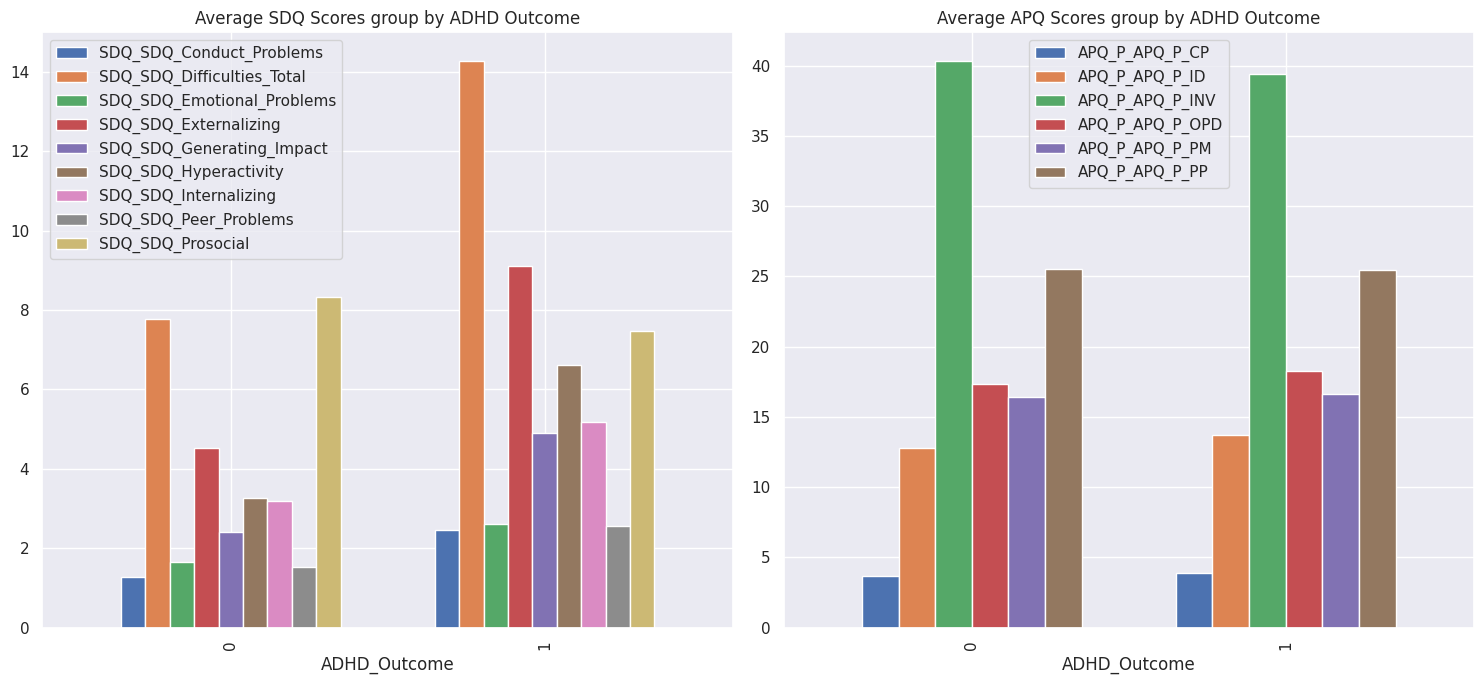

In [25]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
combinded_groups = [
    {'cols': SDQ_cols, 'title': 'SDQ Scores'}, 
    {'cols': APQ_cols, 'title': 'APQ Scores'}
 ]

for i, group in enumerate(combinded_groups): 
    df.groupby(target_cols[0])[group['cols']].mean().plot(
        kind='bar',
        width=0.7,
        ax=axes[i],
        title = f'Average {group["title"]} group by ADHD Outcome'
    ) 

    plt.legend() 
    
plt.tight_layout()         
plt.show()  

#### **📝 Note:**

1. To account for the data's imbalance, I calculated the means of all variables in the SDQ and APQ questionnaires grouped by the ADHD and control groups.
   
2. For the SDQ graph, I observe that, except for the **Prosocial** Score, where the Control Group was slightly higher than the ADHD group, all other means of variables were higher in the ADHD Group.

3. The ADHD group showed significantly higher means than the Control Group in **Difficulties Total,  Externalizing, and Hyperactivity.**

4. For **Generating_Impact and Internalizing**, the ADHD group's means were a bit higher than those of the Control group.

5.  For **Conduct_Problems, Emotional_Problems, and Peer Problems**, the ADHD group's means were only slightly higher than those of the Control group.

6.  For the APQ scale, the means of the ADHD group and the Control group are quite similar. This may suggest that parenting styles have little effect on the development of ADHD.

7.  Maybe I need an Independent Samples T-test

####  3️⃣ ***Barplot of Average SDQ Scores by ADHD Outcome & Boxplot by Outcome and Sex***   

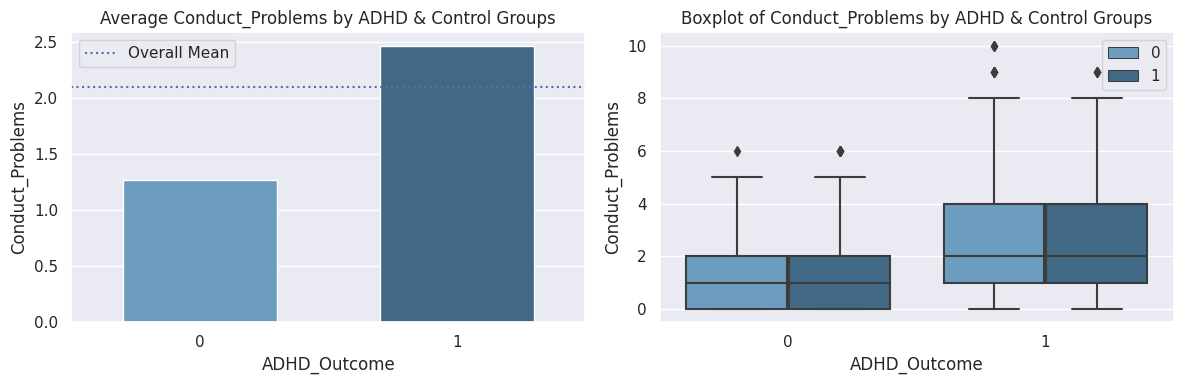

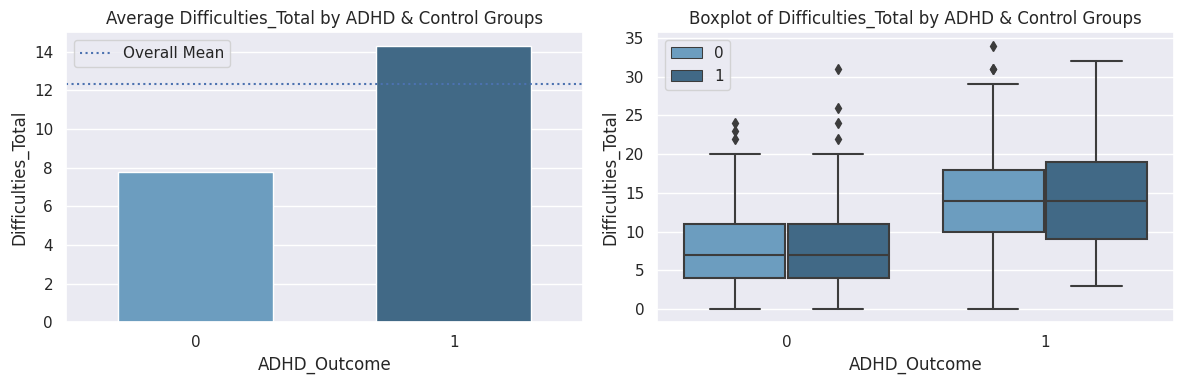

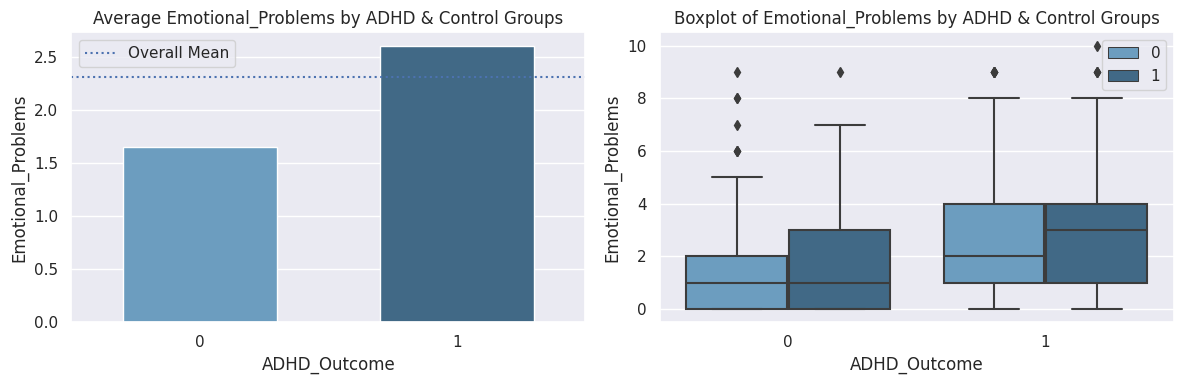

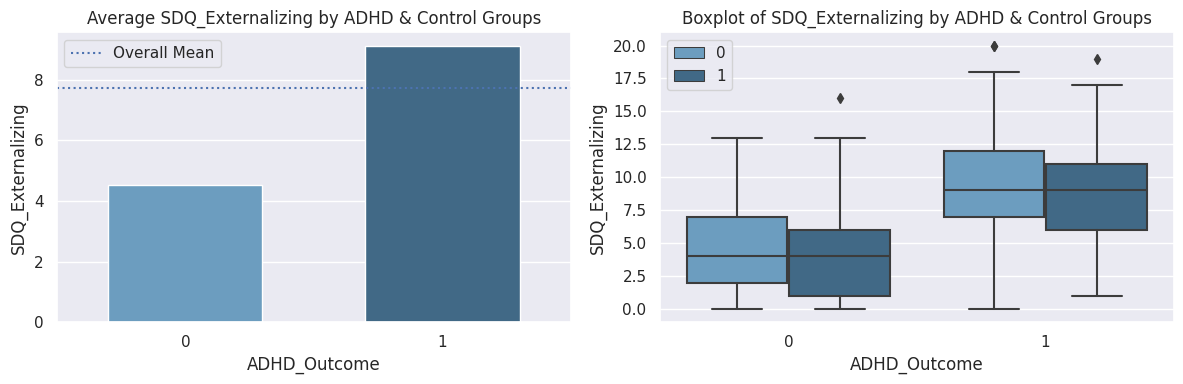

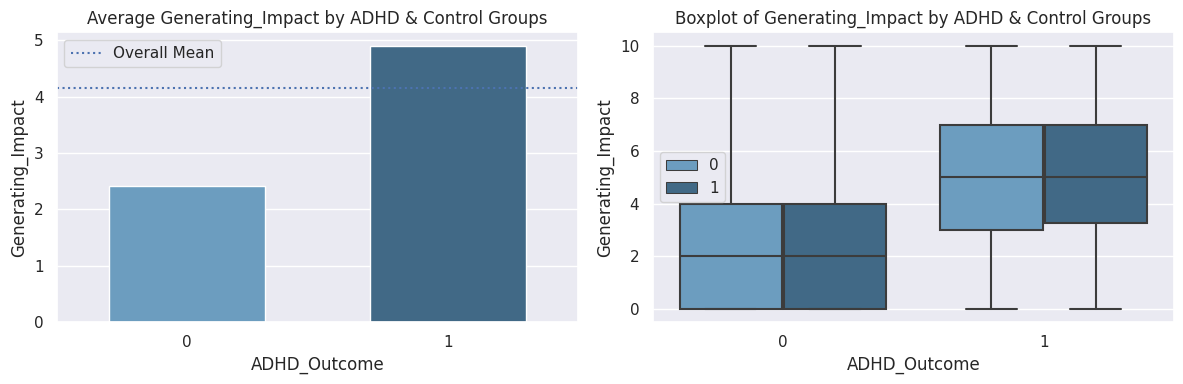

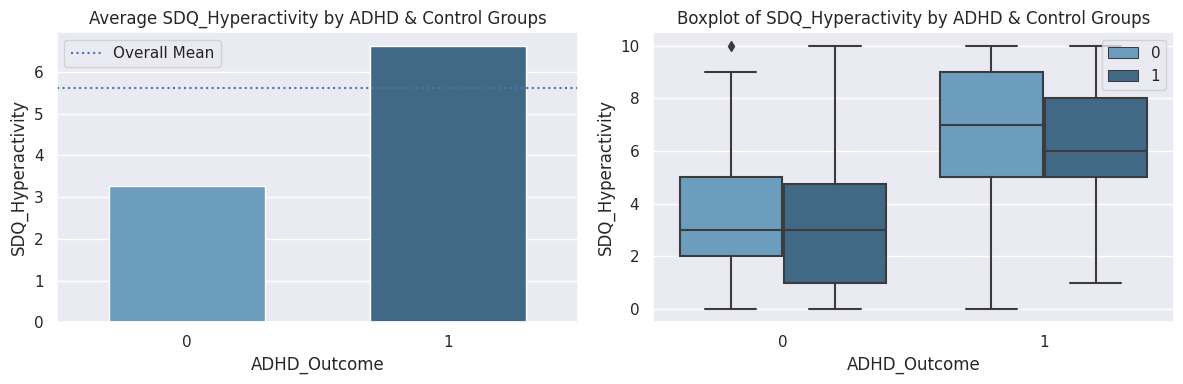

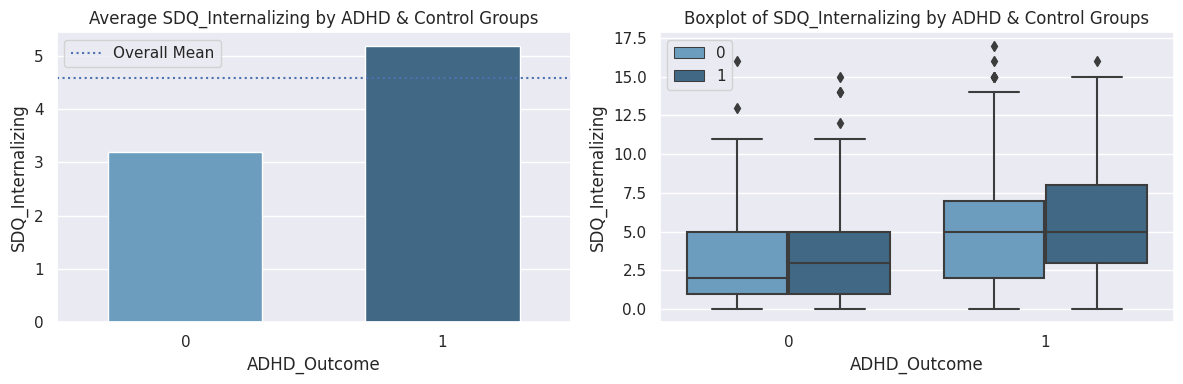

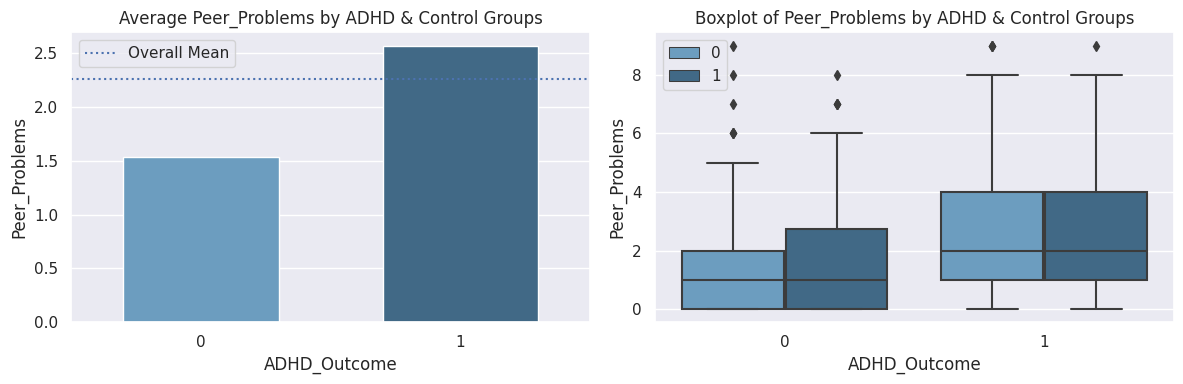

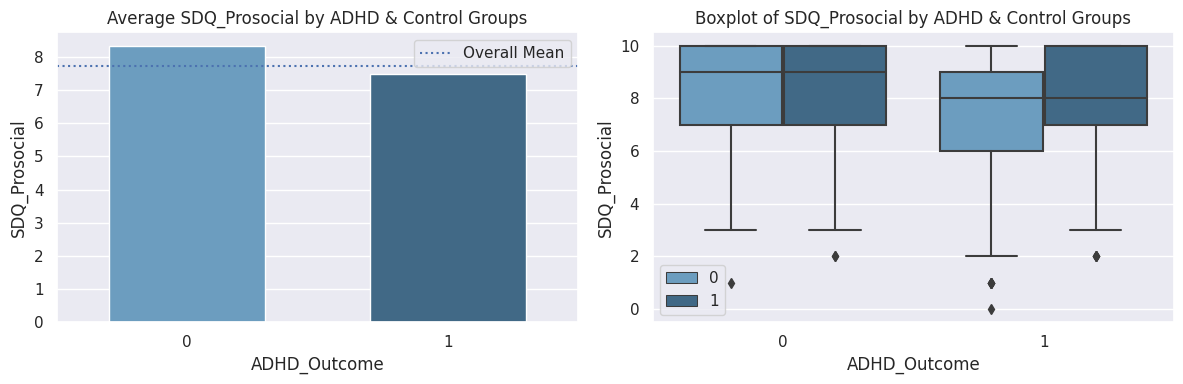

In [26]:
for i, col in enumerate(SDQ_cols):   
    fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,4)) 
    mean_vals = df.groupby(target_cols[0])[col].mean().reset_index()
    split_label = '_'.join(col.split('_')[-2:])  

    sns.barplot(data=mean_vals,
                x = target_cols[0],
                y = col,
                width=0.6,
                palette='Blues_d',
                ax=ax1)
    ax1.axhline(y=df[col].mean(), 
                linestyle=':',
                label='Overall Mean' 
                )
    ax1.set_ylabel(split_label)   
    ax1.legend() 
    ax1.set_title(f"Average {split_label} by ADHD & Control Groups")     


    sns.boxplot(data=df, 
                x = target_cols[0],
                y = col,
                hue = target_cols[1],
                palette='Blues_d',
                ax=ax2)
    ax2.set_ylabel(split_label) 
    ax2.legend() 
    ax2.set_title(f"Boxplot of {split_label} by ADHD & Control Groups")    

    plt.tight_layout() 
    plt.show()  

 ####  4️⃣ ***Correlations between SDQ Scores with ADHD***   

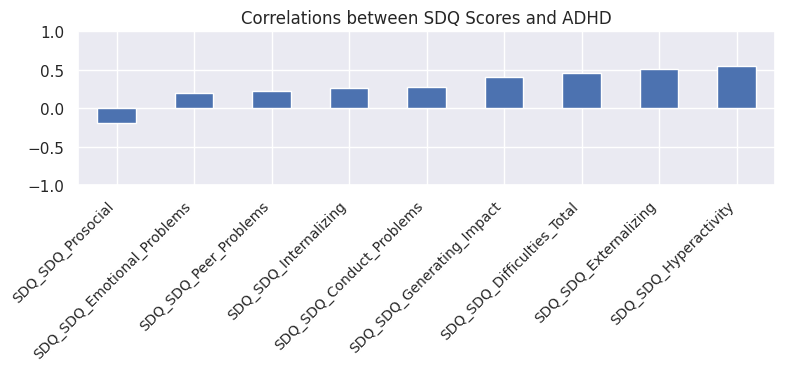

In [27]:
corr_SDQ_ADHD = df[SDQ_cols + ['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome').sort_values()  

fig = plt.figure(figsize=(9,2))
ax = corr_SDQ_ADHD.plot(kind='bar',
                        width=0.5,
                        title= 'Correlations between SDQ Scores and ADHD',
                        )   
 
ax.set(ylim=[-1,1]) 
ax.set_xticklabels(corr_SDQ_ADHD.index,
                   rotation=45, 
                   ha='right',
                   fontsize=10)     

plt.show()  

### 📝 **Note:**  

* **Columns Hyperactivity, Externalizing, Difficulties_Total,and Generating_Impact have a moderate correlation with ADHD.**   

### **5️⃣ Violinplot of Alabama Parenting Questionnaire (APQ)**   

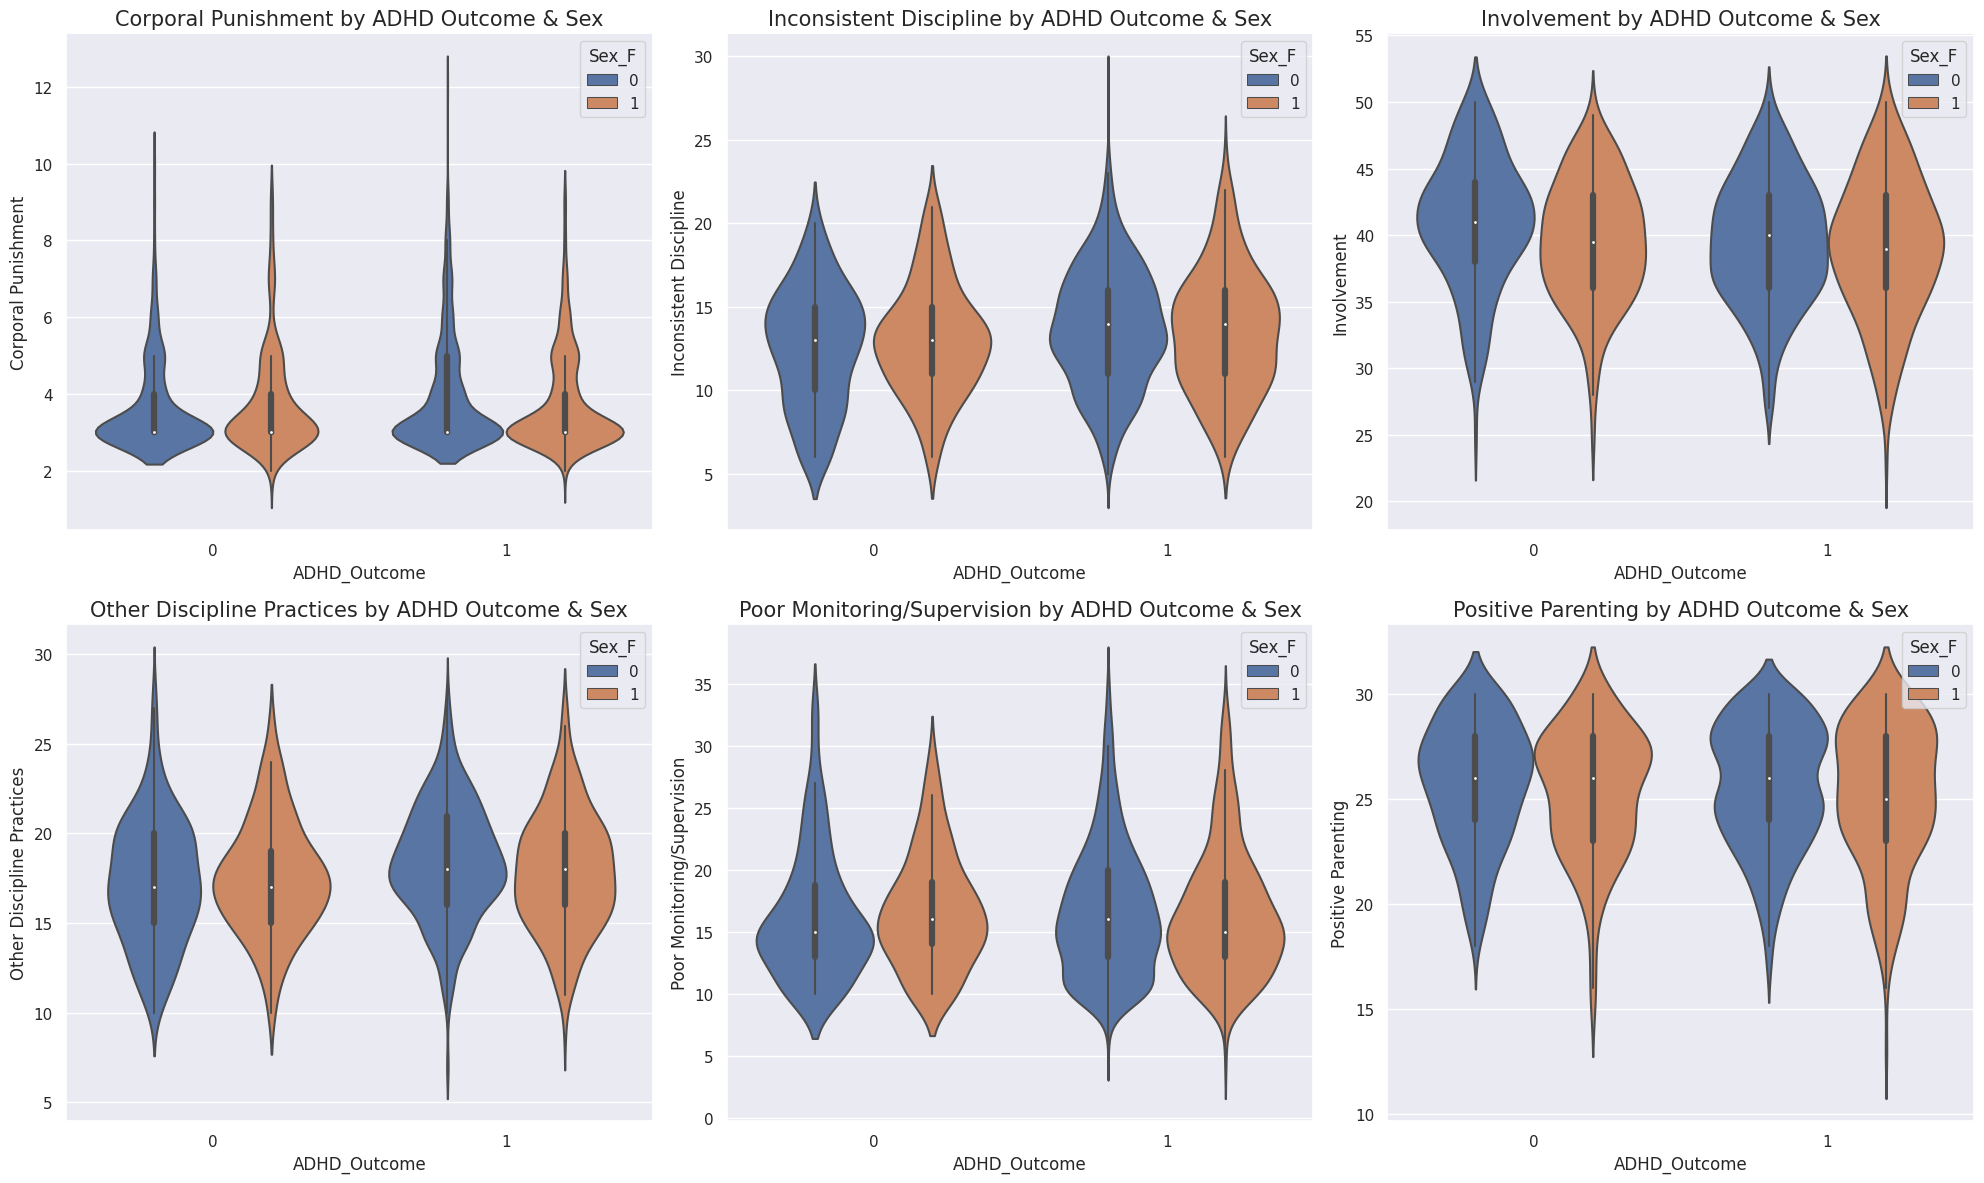

In [28]:
fig = plt.figure(figsize=(20,12))
label_map = {'APQ_P_APQ_P_CP': 'Corporal Punishment',
            'APQ_P_APQ_P_ID': 'Inconsistent Discipline',
            'APQ_P_APQ_P_INV': 'Involvement',
            'APQ_P_APQ_P_OPD': 'Other Discipline Practices',
            'APQ_P_APQ_P_PM': 'Poor Monitoring/Supervision',
            'APQ_P_APQ_P_PP': 'Positive Parenting'}
custom_labels_APQ = [label_map[idx] for idx in APQ_cols]  


for i, col in enumerate(APQ_cols):  
    plt.subplot(2,3,i+1) 
    sns.violinplot(data=df,
                   x = target_cols[0],
                   y=col,
                   hue=target_cols[1], 
                  ) 
    
    plt.ylabel(custom_labels_APQ[i]) 
    plt.title(f'{custom_labels_APQ[i]} by ADHD Outcome & Sex',
             fontsize=15)  
    plt.tight_layout() 

plt.show()  

### **6️⃣ Clinical Measurements**   

**1.Edinburgh Handedness Questionnaire**

**2.Ishihara Color Test**

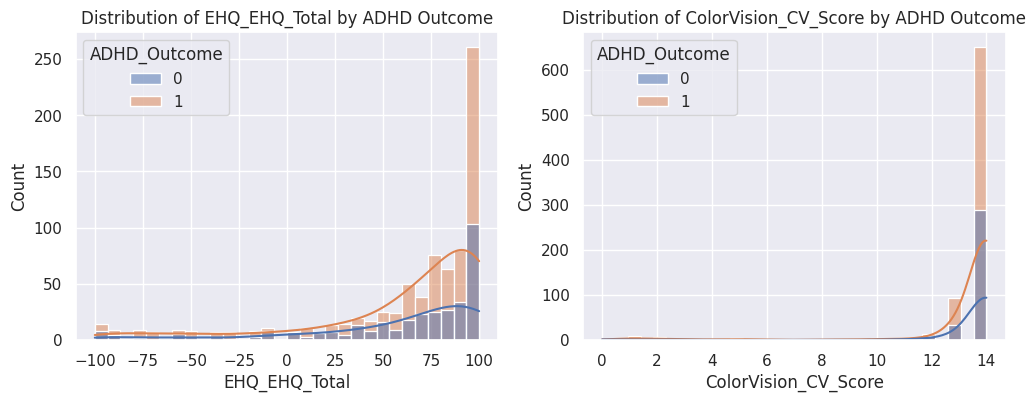

In [29]:
clinical_cols = ['EHQ_EHQ_Total', 'ColorVision_CV_Score'] 
fig = plt.figure(figsize=(12,4))

for i, col in enumerate(clinical_cols):
    plt.subplot(1,2,i+1) 
    sns.histplot(data = df,
                 x = col, 
                 bins=30,
                 kde=True,
                 hue='ADHD_Outcome') 
    plt.title(f'Distribution of {col} by ADHD Outcome') 

plt.show() 

### 🧠 **Understand Functional Connectome Matrices:** 

In [30]:
os.listdir('/kaggle/input/functional-matrices')   

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

In [31]:
df_fcm = pd.read_csv('/kaggle/input/functional-matrices/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

df_fcm = df_fcm.merge(df_solu, 
                     on = 'participant_id', 
                     how = 'inner') 

## 🔭 ***Data Exploration (EDA) & Preprocessing***  

### 🔍 **1. Shape of the DataFrame**

In [32]:
df_fcm.shape

(1213, 19903)

### 🔍 **2. Take a glimpse of Data:**

In [33]:
df_fcm.head(5)

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221,1,0
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176,1,1
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232,1,1
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193,1,1
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273,1,1


### 🔍 **3. Check Missing & Duplicated Values:**

In [34]:
df_fcm.isnull().sum().sum() 

0

In [35]:
df_fcm.duplicated().sum() 

0

### 🔍 **4. Separate ADHD and Control Groups & Identify Connectome Columns:**  

In [36]:
adhd_group = df_fcm[df_fcm['ADHD_Outcome']==1] 
control_group = df_fcm[df_fcm['ADHD_Outcome']==0] 
connectome_cols = [col for col in df_fcm.columns if 'throw' in col]  

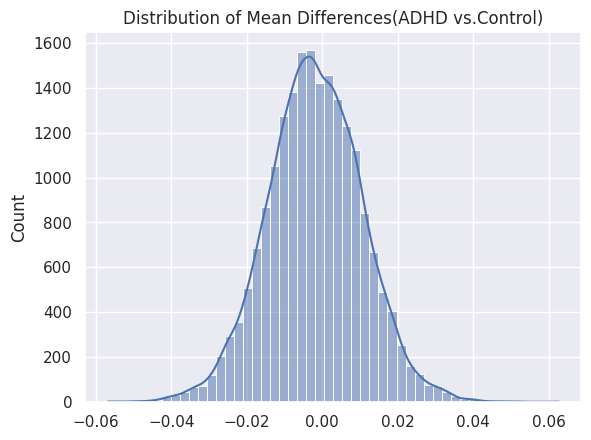

In [37]:
adhd_means = adhd_group[connectome_cols].mean() 
control_means = control_group[connectome_cols].mean() 
diff = adhd_means - control_means 

sns.histplot(data=diff,
             bins=50,
             kde=True) 

plt.title('Distribution of Mean Differences(ADHD vs.Control)')    
plt.show() 

### 📝 **Note:**  

1. Approximate normalized distribution
2. Overall small differences between groups
3. The range of mean difference: ±0.04 

### 🔍 **5. Independent Samples T-Test & False Discovery Rate correction:**  

In [38]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Independent T-test 
pvalues = []
for col in connectome_cols:
    t,p = stats.ttest_ind(adhd_group[col], control_group[col])
    pvalues.append((col, t, p)) 

# FDR 
p_vals = [p for (col,t,p) in pvalues] 
cols = [col for (ocl,t,p) in pvalues] 
reject,_ = fdrcorrection(p_vals, alpha=0.05) 
significant_conns = [col for col,r in zip(cols, reject) if r]  
print(f'Number of significant connections: {len(significant_conns)}')

Number of significant connections: 0


### 📝 **Notes:**   

**1. Number of significant connections after FDR is 0.** 

**2. Next Steps:**

 * **Calculate Effcet Sizes and Choose top 10%**
 * **PCA** 

###  🔍 **6. Calculate Effect Sizes**  

In [39]:
def effect_size(dfc_adhd, dfc_control, top_percent=10):
    adhd_values = dfc_adhd[connectome_cols].values
    control_values = dfc_control[connectome_cols].values 
    n_connections = len(connectome_cols)
    effect_sizes = np.zeros(n_connections) 

    for i in range(n_connections): 
        mean1, mean2 = np.mean(adhd_values[:,i]), np.mean(control_values[:,i])
        std1, std2 = np.std(adhd_values[:,i], ddof=1), np.std(control_values[:,i], ddof=1)     
        n1, n2 = len(adhd_values), len(control_values)   
        pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1+n2-2))  
        d = (mean1-mean2) / pooled_std if pooled_std !=0 else 0  
        effect_sizes[i] = d    
        
    connection_data = pd.DataFrame({ 
                                    'connection_idx': np.arange(n_connections),
                                    'effect_size': effect_sizes, 
                                    'abs_effect' : np.abs(effect_sizes)
                                    }).sort_values('abs_effect', ascending=False)  
    
    n_selected = int(n_connections*top_percent/100)
    selected_connections = connection_data.iloc[:n_selected]
    return selected_connections['connection_idx'], effect_sizes


def extract_selected_features(df, selected_indices):
    return df[connectome_cols].iloc[:, selected_indices] 
 

selected_indices, effect_sizes = effect_size(adhd_group, control_group, 10)
adhd_features = extract_selected_features(adhd_group, selected_indices)
control_features = extract_selected_features(control_group, selected_indices)  

In [40]:
X = np.vstack([adhd_features, control_features]) 
y = np.hstack([np.ones(len(adhd_features)), np.zeros(len(control_features))])  

Original Feature Dimension: 1990
Feature Dimension after PCA:668


Text(0.5, 1.0, 'PCA of Brain Connectivity by ADHD Status')

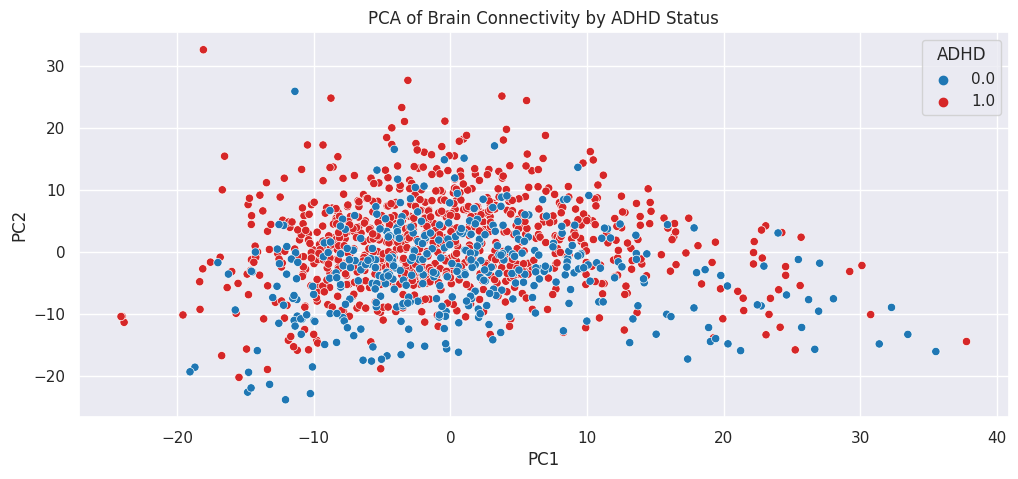

In [41]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)  

print(f'Original Feature Dimension: {X.shape[1]}')  
print(f'Feature Dimension after PCA:{X_pca.shape[1]}') 

pca_df = pd.DataFrame({
                        'PC1': X_pca[:, 0],
                        'PC2': X_pca[:, 1],
                        'ADHD': np.hstack([np.ones(len(adhd_features)), np.zeros(len(control_features))]) 
                      }) 

plt.figure(figsize=(12, 5))

sns.scatterplot(data=pca_df, 
                x='PC1', 
                y='PC2', 
                hue='ADHD',  
                palette=['#1f77b4', '#d62728']) 
plt.title('PCA of Brain Connectivity by ADHD Status')  

In [42]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f'explained_variance: {explained_variance[:2].sum():.1%}')
print(f'Cumulative explanatory variance: {cumulative_variance[-1]:.1%}')  

explained_variance: 7.0%
Cumulative explanatory variance: 95.0%


### 📝 **Notes:** 

**1. Explained Variance is low.**

**2. The functional connectivity patterns of the brain exhibit high-dimensional characteristics, making it difficult for a single principal component to capture the majority of the variance.**

  **3. Next Steps:**
   * Nonlinear Dimensionality Reduction
   * Feature Selection
   * Feature Engineering 

### **( ✨ For my Curiosity)  Reconstruct the connection matrix & Visualize Connectivity Matrix of a Sample**

Text(0.5, 1.0, 'Brain Functional Connectivity Matrix')

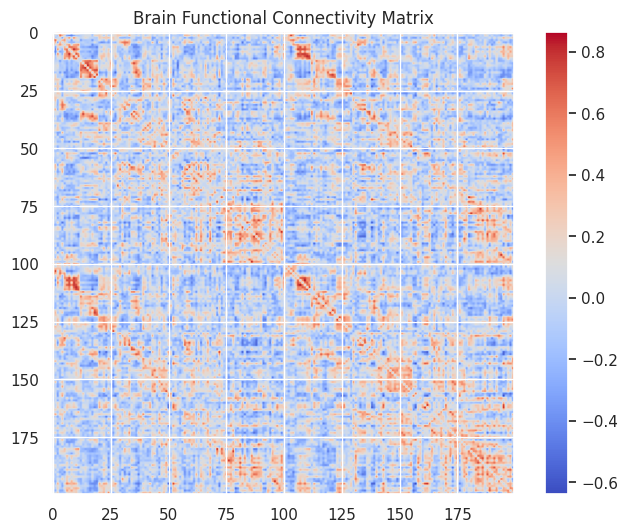

In [43]:
def reconstruct_matrix(row, num_regions=200): 
    
    matrix = np.zeros((num_regions, num_regions)) 
    connectome_cols = [col for col in row.index if 'throw' in col] 
    connectome_values = row[connectome_cols].values 

    index = 0 
    for i in range(num_regions):
        for j in range(i+1, num_regions):
            matrix[i,j] = connectome_values[index] 
            matrix[j,i] = connectome_values[index] 
            index+=1  
    return matrix

sample_matrix = reconstruct_matrix(df_fcm.iloc[0]) 

plt.figure(figsize=(8,6))
plt.imshow(sample_matrix,
          cmap='coolwarm') 
plt.colorbar() 
plt.title('Brain Functional Connectivity Matrix') 